Imprimir los datos de la calidad del aire de Madrid de  la siguiente URL
import requests
"http://www.mambiente.munimadrid.es/opendata/horario.txt"

In [2]:
import requests
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
resp = requests.get(url)
with open('data/horario.txt', 'wb') as output:
   output.write(resp.content)
# Me está generando un error 503

- El codigo 200 o cualquier otro código que comience con '2' suele indicar éxito
- El código 404 recurso no encontrado
- 503 El servidor no puede manejar la solicitud en ese momento debido a una carha alta, mantenimiento o problemas temporales.

FICHEROS INCLUIDOS EN LA PAGINA WEB

EJEMPLO: DATOS DE CONTAMINACION EN MADRID. FICHERO horario.txt

In [ ]:
import requests
import matplotlib.pyplot as plt
import csv

with open(path + 'horario.txt', 'wb') as output:
output.write(resp.content)

In [ ]:
Ya tenemos el fichero en nuestro ordenador y podemos tratarlo. En nuestro ejemplo el fichero contiene los datos de contaminación del día en curso. El formato es:
• Columnas 0, 1, 2: concatenadas identifican la estación. Por ejemplo 28,079,004 identifica a la estación situada en la Plaza de España.
• Columnas 3, 4, 5: identifican el valor medido. Por ejemplo, si la columna 3 tiene el valor 12 indica que se trata de una medida de óxido de nitrógeno (las otras dos columnas son datos acerca de la medición que no vamos a usar).
• Columnas 6, 7, 8: año, mes, día de la medición, respectivamente.
• Columnas 9 – 56: indican el valor en cada hora del día. Van por parejas, donde el primer número indica la medición y el segundo es “V” si es un valor válido o “N” si no debe tenerse en cuenta. Por tanto, la columna 9 tendrá la medición a las 00 horas si la columna 10 es una “V”, la columna 11 la medición a las 01 horas si la columna 12 es una “V”, y así sucesivamente. 
  En la práctica, el primer valor “N” corresponde con la hora actual, para la que todavía no hay medición.

Ahora abrimos el fichero y generamos el vector con los valores que corresponden a la línea de la Plaza de España para el óxido de nitrógeno. Lo que hacemos es recorrer las columnas por su posición, primero para seleccionar la línea que corresponde a la estación de la Plaza de España y para el valor 12 (óxido de nitrógeno), y, una vez localizada la línea con los datos, recorrer de la columna 9 en
adelante añadiendo valores al vector vs hasta encontrar la primera “N” en la columna siguiente al valor:

La variable desp indica la columna dentro de cada fila del fichero en la que empiezan los valores medidos. En particular, para cada hora, la columna desp+2*hora contiene el valor medido en esa hora, que solo será válido si la columna desp+2*hora+1 contiene una “V”. Tras recoger los valores válidos en el array vs y sus horas asociadas en el array horas, la llamada a plot crea la gráfica a 
partir de dos vectores: uno con los valores x, que en este caso son las horas y otro, de la misma longitud, con los valores y, en este caso los valores medidos.

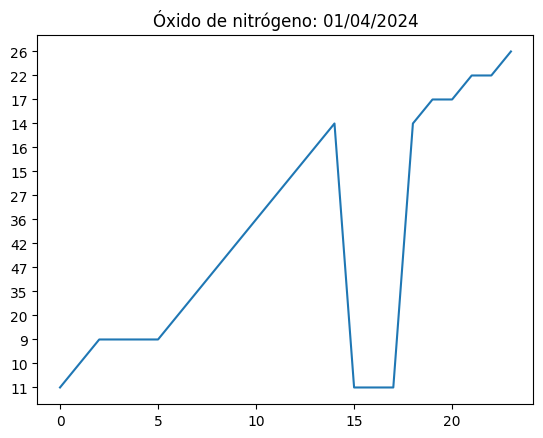

In [7]:
import requests
import matplotlib.pyplot as plt
import csv

with open('horario.txt') as csvfile:
 readCSV = csv.reader(csvfile, delimiter=',')
 for row in readCSV:
    if (row[0]+row[1]+row[2]=='28079004' and
        row[3]=='12'):
        plt.title("Óxido de nitrógeno: "
            +row[8]+"/"+row[7]+"/"+row[6])
    hora = 0
    desp = 9
    vs = []
    horas = []
    while hora<=23:
      if row[desp+2*hora+1]=='V':
        vs.append(row[desp+2*hora])
        horas.append(hora)
      hora +=1
    plt.plot(horas, vs)
    plt.show()

La figura nos muestra un ejemplo para un día de diario. Vemos la subida en el nivel de contaminación en las 17 horas más o menos, y hubo una bajada brusca cerca de las 14 horas.

De esta forma, guardando los ficheros correspondientes a cada día podríamos calcular medias anuales, ver la evolución de la contaminación, o incluso intentar predecir los valores por anticipado.

Aunque en este caso el fichero es de reducido tamaño, en ocasiones los ficheros sobre los que queremos trabajar pueden ser realmente grandes, y puede que no nos interese descargarlos completos. En estos casos, podemos utilizar el procesamiento perezoso, que busca utilizar la menor información posible. Inicialmente, importamos las bibliotecas necesarias:

>>> import requests
>>> from contextlib import closing
>>> import csv
>>> import codecs
>>> import matplotlib.pyplot as plt

Llama la atención la incorporación de dos nuevas bibliotecas:
• codecs: utilizada para leer directamente los strings en formato utf-8.

• contextlib: nos permite leer directamente el valor devuelto por
requests.get.

Ahora el resto del código:

>>> url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
>>> with closing(requests.get(url, stream=True)) as r:
     reader = csv.reader(codecs.iterdecode(r.iter_lines(),'utf-8'),delimiter=',')
    for row in reader:
      ..... # igual que en el código anterior
      
Este código hace lo mismo que el anterior, pero evita:

a) Tener que grabar el fichero en disco, gracias a la lectura directa de
request.get(). 

b) Cargarlo completo en memoria, gracias a la opción stream=True de
requests.get().


DATOS QUE FORMAN PARTE DE LA PAGINA

El siguiente método consiste en obtener los datos a partir de una página web. Para extraer los datos, necesitaremos conocer la estructura de la página web, que normalmente está compuesta por código HTML, imágenes, scripts y ficheros de estilo. La descripción detallada de todos estos componentes está más allá del propósito de este libro, pero vamos a ver los conceptos básicos que nos permitan
realizar nuestro objetivo: hacer web scraping.

Podemos cargar la página Web como un fichero de texto normal, y mostrarla mediante la biblioteca BeautifulSoup:

In [9]:
from bs4 import BeautifulSoup
url = r"c:\...\mini.html"
with open('mini.html', "r") as f:
 page = f.read()
 soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Un mini ejemplo
  </title>
 </head>
 <body>
  <div id="date">
   Fecha 25/03/2035
  </div>
  <div id="content">
   Un poco de texto
  </div>
 </body>
</html>



La variable soup contiene la página en forma de cadena de caracteres, que convertimos en un formato interno estructurado usando la constructora
BeautifulSoup, a la que indicamos como segundo elemento que se debe emplear el analizador sintáctico (parser) propio de HTML, en este caso “html.parser”. Si la
página es muy compleja podemos necesitar otro analizador, como “html5lib”, más lento en el procesamiento, pero capaz de tratar páginas más complicadas.
En nuestro, ejemplo el resultado del análisis se guarda en la variable soup. Laúltima instrucción muestra el código HTML en un formato legible.

Un poco de HTML

Para hacer web scraping debemos identificar los elementos fundamentales que se pueden encontrar en un documento HTML. 

Navegación absoluta

Como acabamos de ver, los documentos HTML, al igual que sucede en XML, siguen una estructura jerárquica. Los elementos que están directamente dentro de otros se dice que son hijos del elemento contenedor y hermanos entre sí. En nuestro miniejemplo, los elementos <div id="date"> y <div id="content"> son hermanos entre sí, y ambos son hijos del elemento <body>. Además, <div id="date"> tiene a su vez un hijo, que en esta ocasión no es otro elemento sino un texto. La biblioteca BeautifulSoup nos permite utilizar estos conceptos para navegar por el documento buscando la información que precisamos. Como ejemplo inicial, podemos preguntar por los hijos del documento raíz, y su tipo para hacernos una idea de lo que vamos a encontrarnos:

In [10]:
hijosDoc = list(soup.children)
print([type(item) for item in hijosDoc])
print(hijosDoc)

[<class 'bs4.element.Doctype'>, <class 'bs4.element.NavigableString'>, <class 'bs4.element.Tag'>]
['html', '\n', <html>
<head>
<title>Un mini ejemplo</title>
</head>
<body>
<div id="date"> Fecha 25/03/2035 </div>
<div id="content"> Un poco de texto </div>
</body>
</html>]


El primer print nos indica que hay 3 hijos:
• El primero, de tipo bs4.element.Doctype, corresponde a la primera línea.
•  El segundo, de tipo bs4.element.NavigableString que, como vemos en el
   siguiente print, es tan solo el fin de línea que se encuentra entre línea inicial
   y la etiqueta <html>, y que se representa por \n.
• El tercer elemento, del tipo bs4.element.Tag, corresponde al documento
  HTML en sí mismo.

Ahora podemos seleccionar el tercer elemento (índice 2) y tendremos acceso al documento HTML en sí.

In [11]:
html = hijosDoc[2]
print(list(html.children))

['\n', <head>
<title>Un mini ejemplo</title>
</head>, '\n', <body>
<div id="date"> Fecha 25/03/2035 </div>
<div id="content"> Un poco de texto </div>
</body>, '\n']


Repitiendo el proceso podemos ver que html tiene 5 hijos, aunque tres corresponden a saltos de línea, y solo 2 nos interesan: head y body. De la misma
forma podemos obtener los elementos contenidos en head y body, y repetir el proceso hasta analizar toda la estructura. La figura 2-2 muestra el árbol resultante, 
donde por simplicidad se han eliminado los valores \n a partir del segundo nivel.

En particular, supongamos que nos interesa el texto asociado al div con atributo id = date. Primero seleccionamos el elemento body, que es el cuarto hijo (índice
Python 3) de html, y una vez más examinamos sus hijos:

In [12]:
body = list(html.children)[3]
print(list(body.children))

['\n', <div id="date"> Fecha 25/03/2035 </div>, '\n', <div id="content"> Un poco de texto </div>, '\n']


Comprobamos que body tiene 5 hijos: \n, el primer div, \n, el segundo div, y de nuevo \n. Como estamos interesados en el texto del primer div, accedemos a este elemento:

In [13]:
divDate = list(body.children)[1]

Este elemento ya no tiene otros elementos tipo tag como hijos. Solo un elemento de tipo bs4.element.NavigableString, que corresponde al texto que buscamos. Podemos obtenerlo directamente con el método get_text():

In [14]:
print(divDate.get_text())
# que muestra el valor deseado: Fecha 25/03/2035.

 Fecha 25/03/2035 


NAVEGACION RELATIVA